In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train_EOSINOPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TRAIN/EOSINOPHIL")

train_LYMPHOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TRAIN/LYMPHOCYTE")

train_MONOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE")

train_NEUTROPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL")

In [3]:
test_EOSINOPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST/EOSINOPHIL")

test_LYMPHOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST/LYMPHOCYTE")

test_MONOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST/MONOCYTE")

test_NEUTROPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/images\TEST/NEUTROPHIL")

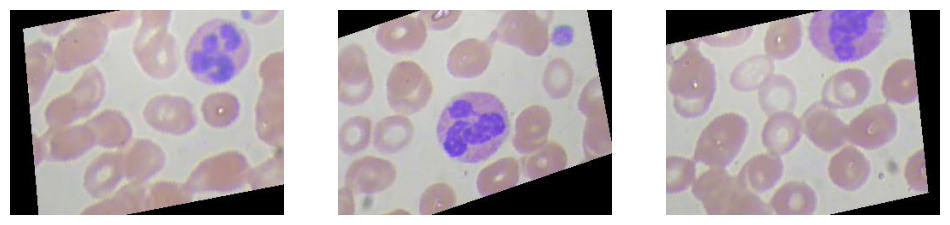

In [4]:
eosinophil_img = [os.path.join(train_EOSINOPHIL, file)
    for file in os.listdir(train_EOSINOPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(eosinophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

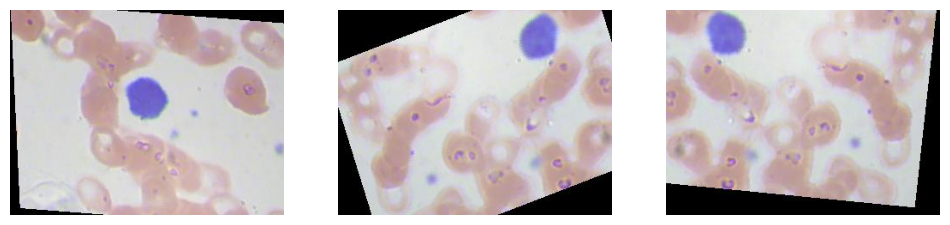

In [5]:
lymphocyte_img = [os.path.join(train_LYMPHOCYTE, file)
              for file in os.listdir(train_LYMPHOCYTE)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(lymphocyte_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

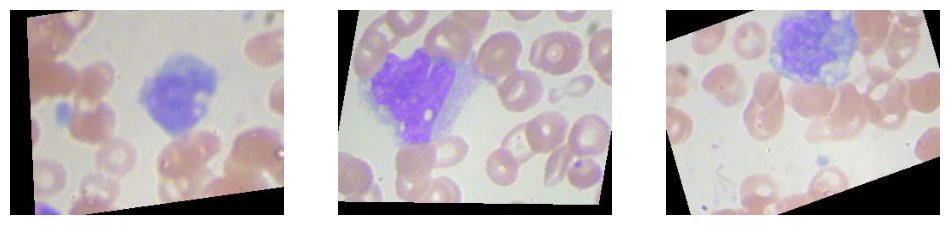

In [6]:
monocyte_img = [os.path.join(train_MONOCYTE, file)
              for file in os.listdir(train_MONOCYTE)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(monocyte_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

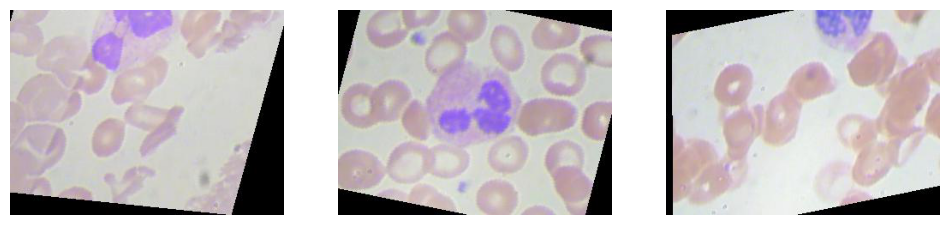

In [7]:
neutrophil_img = [os.path.join(train_NEUTROPHIL, file)
              for file in os.listdir(train_NEUTROPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(neutrophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [8]:
datagen = ImageDataGenerator()

In [9]:
train_generator = datagen.flow_from_directory(
    directory=r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TRAIN", 
    target_size=(320, 240), 
    batch_size=128, 
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    directory=r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST", 
    target_size=(320, 240), 
    batch_size=128, 
    class_mode='categorical'
)

Found 6134 images belonging to 4 classes.
Found 1990 images belonging to 4 classes.


***

In [10]:
#In this case, we use the weights from Imagenet and the network is a ResNet50. The option include_top=False allows feature extraction by removing the last dense layers. This let us control the output and input of the model.
base_model = ResNet50(include_top=False,weights="imagenet")
for layer in base_model.layers[:140]:
    layer.trainable = False

2022-11-29 01:23:09.251112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, "-", layer.trainable)

0 input_1 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [12]:
#For ResNet, call tf.keras.applications.resnet.preprocess_input on your inputs before passing them to the model. resnet.preprocess_input will convert the input images from RGB to BGR, then will zero-center each color channel with respect to the ImageNet dataset, without scaling.

model = keras.Sequential()

model.add(layers.Input(shape=(240,320,3)))
model.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 240, 320, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 14,986,244
Non-trainable params: 8,609,664
_________________________________________________________________


In [13]:
# model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

# history = model.fit_generator(train_generator,epochs=1,validation_data=test_generator)

In [14]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=8,
#     epochs=15,
#     verbose=1,
#     validation_data = test_generator,
#     validation_steps = 8
# )

In [15]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

history = model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
48/48 [==============================] - 4890s 102s/step - loss: 0.2980 - accuracy: 0.8940 - val_loss: 177.8927 - val_accuracy: 0.2643
Epoch 2/10
48/48 [==============================] - 4826s 101s/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 6.7614 - val_accuracy: 0.6633
Epoch 3/10
48/48 [==============================] - 2795s 58s/step - loss: 0.0245 - accuracy: 0.9933 - val_loss: 0.3895 - val_accuracy: 0.9296
Epoch 4/10
48/48 [==============================] - 2350s 49s/step - loss: 0.0176 - accuracy: 0.9959 - val_loss: 0.3350 - val_accuracy: 0.9352
Epoch 5/10
48/48 [==============================] - 2364s 49s/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.6082 - val_accuracy: 0.9211
Epoch 6/10
48/48 [==============================] - 15688s 333s/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.3882 - val_accuracy: 0.9447
Epoch 7/10
48/48 [==============================] - 948s 20s/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.3309 - val_accuracy: 0